### Задание 1
#### Импортируйте библиотеки pandas, numpy и matplotlib.
#### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
#### Создайте датафреймы X и y из этих данных.
#### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
#### Масштабируйте данные с помощью StandardScaler.
#### Постройте модель TSNE на тренировочный данных с параметрами:
#### n_components=2, learning_rate=250, random_state=42.
#### Постройте диаграмму рассеяния на этих данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [11]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
y = pd.DataFrame(boston.target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

In [24]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Мы видим, что число признаков уменьшилось с 13 до 2. Теперь можно визуализировать наши данные на плоскости.

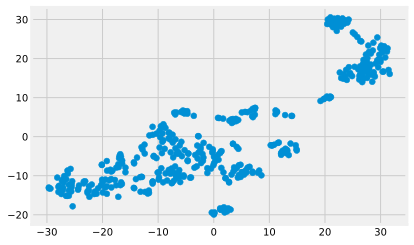

In [26]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
#### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
#### Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
#### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
#### Вычислите средние значения price и CRIM в разных кластерах.

In [76]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [78]:
train_labels = model.fit_predict(X_train_scaled)
print(train_labels)

[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0 2 2 1 1 2 0 0
 2 2 0 0 2 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 0 2 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 0 2 1 1 2 1 2 0 0 0 2 2 0 2 2 2 1
 0 2 0 0 1 1 1 2 2 2 1 1 2 0 1 1 0 0 1 0 2 2 2 2 1 2 0 2 1 2 1 2 2 2 1 2 2
 2 2 2 1 0 2 0 1 1 1 1 1 0 2 1 2 1 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 2 2 1 2 1
 1 0 0 1 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 0 2 2 2 2 0 2 1 2 1 0 1 2 1 1 1
 1 2 2 0 0 2 0 2 1 2 2 2 2 2 1 1 0 2 2 0 0 1 1 2 0 1 1 2 0 0 1 2 0 1 2 2 1
 2 1 2 2 0 2 2 2 2 2 2 0 1 2 1 2 2 0 2 1 1 0 1 2 1 2 2 1 0 0 2 1 0 1 1 1 2
 0 1 2 2 2 2 2 2 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 1 2 1 0 2 2 1 2 1
 1 2 2 1 0 2 2 0 2 2 2 1 2 2 2 2 1 2 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 0 1 0 1 2 1 0 2 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 0 2 2 2 0 1 2]


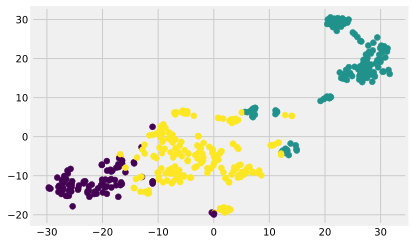

In [79]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [80]:
print(f'Среднее значение price в кластере 0: {y_train.price[train_labels == 0].mean()}')
print(f'Среднее значение price в кластере 1: {y_train.price[train_labels == 1].mean()}')
print(f'Среднее значение price в кластере 2: {y_train.price[train_labels == 2].mean()}')

print(f'Среднее значение CRIM в кластере 0: {X_train.CRIM[train_labels == 0].mean()}')
print(f'Среднее значение CRIM в кластере 1: {X_train.CRIM[train_labels == 1].mean()}')
print(f'Среднее значение CRIM в кластере 2: {X_train.CRIM[train_labels == 2].mean()}')

Среднее значение price в кластере 0: 27.788372093023252
Среднее значение price в кластере 1: 16.165354330708666
Среднее значение price в кластере 2: 24.958115183246072
Среднее значение CRIM в кластере 0: 0.07356558139534886
Среднее значение CRIM в кластере 1: 10.797028425196853
Среднее значение CRIM в кластере 2: 0.42166020942408367


### * Задание 3
#### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
#### Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [81]:
test_labels = model.predict(X_test_scaled)
print(test_labels)

[2 0 1 2 1 2 2 1 1 2 2 2 1 2 2 1 2 1 0 1 0 0 2 2 1 1 2 1 2 2 2 2 1 1 1 1 2
 2 2 2 2 2 0 2 2 1 2 2 1 2 2 0 2 2 2 1 1 0 2 2 0 0 2 2 0 2 1 0 0 1 2 1 1 0
 2 1 2 0 1 1 0 1 0 1 2 2 1 2 2 2 2 1 2 2 1 2 1 1 1 1 2 2]


In [82]:
print(f'Среднее значение price в кластере 0: {y_test.price[test_labels == 0].mean()}')
print(f'Среднее значение price в кластере 1: {y_test.price[test_labels == 1].mean()}')
print(f'Среднее значение price в кластере 2: {y_test.price[test_labels == 2].mean()}')

print(f'Среднее значение CRIM в кластере 0: {X_test.CRIM[test_labels == 0].mean()}')
print(f'Среднее значение CRIM в кластере 1: {X_test.CRIM[test_labels == 1].mean()}')
print(f'Среднее значение CRIM в кластере 2: {X_test.CRIM[test_labels == 2].mean()}')

Среднее значение price в кластере 0: 31.35
Среднее значение price в кластере 1: 16.437142857142856
Среднее значение price в кластере 2: 21.860784313725492
Среднее значение CRIM в кластере 0: 0.062060000000000004
Среднее значение CRIM в кластере 1: 10.165531142857143
Среднее значение CRIM в кластере 2: 0.26607882352941176
